Import Datafile

In [100]:
import pid_df
import matplotlib.pyplot as plt
from seaborn import pairplot


pid_kp_pip = pid_df.pid_df('../SingleTracks/kp_geant3_tracks_30274-30795.csv','kp',num_particles=8000)
pid_kp_pip.add_df('../SingleTracks/pip_geant3_tracks_30274-30795.csv','pip',num_particles=2000)

#pid_pip_kp = pid_df.pid_df('../SingleTracks/pip_geant3_tracks_30274-30795.csv','pip',num_particles=900000)
#pid_pip_kp.add_df('../SingleTracks/kp_geant3_tracks_30274-30795.csv','kp',num_particles=100000)

features = ['dEdx_SC','dEdx_TOF','deltaPhitoShower_BCAL','deltaZToShower_BCAL','E_BCAL','E_preshower_BCAL','E_L2_BCAL','E_L3_BCAL','E_L4_BCAL','sigLong_BCAL','sigTrans_BCAL','energy_FCAL','DOCATrack_FCAL','sumU_FCAL','sumV_FCAL','E1E9_FCAL','E9E25_FCAL','chisq_track','Ndof_track','NDF_DCdEdx','ChiSq_DCdEdx','dEdx_FDC','dEdx_CDC','p','theta','measuredBeta','t1','NDF_timing','ChiSq_timing']
features_data = ['dEdx_SC','dEdx_TOF','DeltaPhi_BCAL','DeltaZ_BCAL','E_BCAL','Preshower_E_BCAL','EL2_BCAL','EL3_BCAL','EL4_BCAL','SigLong_BCAL','SigTrans_BCAL','E_FCAL','DOCA_FCAL','SumU_FCAL','SumV_FCAL','E1E9_FCAL','E9E25_FCAL','ChiSq_Tracing','NDF_Tracking','NDF_DcdEdx','ChiSq_DcdEdx','dEdx_FDC','dEdx_CDC','p','theta','Beta_Timing_Measured','HitTime','NDF_Timing_Measured','ChiSq_Timing_Measured']
#kp_p kp_theta kp_mass kp_NDF_Tracking kp_ChiSq_Tracing kp_NDF_DcdEdx kp_ChiSq_DcdEdx kp_HitTime kp_NDF_Timing kp_Beta_Timing kp_ChiSq_Timing kp_Beta_Timing_Measured kp_ChiSq_Timing_Measured kp_dEdx_CDC kp_dEdx_FDC kp_dEdx_TOF kp_dEdx_SC kp_E_BCAL kp_Preshower_E_BCAL kp_EL2_BCAL kp_EL3_BCAL kp_EL4_BCAL kp_SigLong_BCAL kp_SigTrans_BCAL kp_DeltaPhi_BCAL kp_DeltaZ_BCAL kp_E_FCAL kp_E1E9_FCAL kp_E9E25_FCAL kp_SumU_FCAL kp_SumV_FCAL kp_DOCA_FCAL
#features = ['dEdx_SC','dEdx_TOF','E_BCAL','energy_FCAL','dEdx_FDC','dEdx_CDC','p','theta']


pid_kp_pip.set_features(features)
#pid_pip_kp.set_features(features)

cv_analysis = {}
cv_analysis2 = {}

roc_curves = {}
ml_metrics = {}
ml_confusions = {}

0.008148514831315557
0.0012726175962289796


In [101]:
features = ['dEdx_SC','dEdx_TOF','deltaPhitoShower_BCAL','deltaZToShower_BCAL','E_BCAL','E_preshower_BCAL','E_L2_BCAL','E_L3_BCAL','E_L4_BCAL','sigLong_BCAL','sigTrans_BCAL','energy_FCAL','DOCATrack_FCAL','sumU_FCAL','sumV_FCAL','E1E9_FCAL','E9E25_FCAL','chisq_track','Ndof_track','NDF_DCdEdx','ChiSq_DCdEdx','dEdx_FDC','dEdx_CDC','p','theta','measuredBeta','t1','NDF_timing','ChiSq_timing']
features_data = ['dEdx_SC','dEdx_TOF','DeltaPhi_BCAL','DeltaZ_BCAL','E_BCAL','Preshower_E_BCAL','EL2_BCAL','EL3_BCAL','EL4_BCAL','SigLong_BCAL','SigTrans_BCAL','E_FCAL','DOCA_FCAL','SumU_FCAL','SumV_FCAL','E1E9_FCAL','E9E25_FCAL','ChiSq_Tracing','NDF_Tracking','NDF_DcdEdx','ChiSq_DcdEdx','dEdx_FDC','dEdx_CDC','p','theta','Beta_Timing_Measured','HitTime','NDF_Timing_Measured','ChiSq_Timing_Measured']

print(len(features))
print(len(features_data))

mapping_features = {}

for f,f2 in zip(features,features_data):
    mapping_features[f2]=f

print(mapping_features)

29
29
{'dEdx_SC': 'dEdx_SC', 'dEdx_TOF': 'dEdx_TOF', 'DeltaPhi_BCAL': 'deltaPhitoShower_BCAL', 'DeltaZ_BCAL': 'deltaZToShower_BCAL', 'E_BCAL': 'E_BCAL', 'Preshower_E_BCAL': 'E_preshower_BCAL', 'EL2_BCAL': 'E_L2_BCAL', 'EL3_BCAL': 'E_L3_BCAL', 'EL4_BCAL': 'E_L4_BCAL', 'SigLong_BCAL': 'sigLong_BCAL', 'SigTrans_BCAL': 'sigTrans_BCAL', 'E_FCAL': 'energy_FCAL', 'DOCA_FCAL': 'DOCATrack_FCAL', 'SumU_FCAL': 'sumU_FCAL', 'SumV_FCAL': 'sumV_FCAL', 'E1E9_FCAL': 'E1E9_FCAL', 'E9E25_FCAL': 'E9E25_FCAL', 'ChiSq_Tracing': 'chisq_track', 'NDF_Tracking': 'Ndof_track', 'NDF_DcdEdx': 'NDF_DCdEdx', 'ChiSq_DcdEdx': 'ChiSq_DCdEdx', 'dEdx_FDC': 'dEdx_FDC', 'dEdx_CDC': 'dEdx_CDC', 'p': 'p', 'theta': 'theta', 'Beta_Timing_Measured': 'measuredBeta', 'HitTime': 't1', 'NDF_Timing_Measured': 'NDF_timing', 'ChiSq_Timing_Measured': 'ChiSq_timing'}


In [102]:
from pandas import read_csv

kpkmpi0_df = read_csv('../SingleTracks/tracks_031057.csv')


In [103]:
kpkmpi0_df.kp_DOCA_FCAL

0        1.585940
1        1.137660
2        1.137660
3      999.000000
4        1.348740
          ...    
140    999.000000
141      0.757083
142      2.577040
143      1.850290
144      3.163990
Name: kp_DOCA_FCAL, Length: 145, dtype: float64

In [105]:
col_select = []
for col in kpkmpi0_df.columns:
    if col.startswith('kp_'):
        if col == 'kp_Beta_Timing' or col == 'kp_ChiSq_Timing' or col == 'kp_mass':
            continue
        col_select.append(col)
        
kp_data_df = kpkmpi0_df[col_select]
#kp_data_df.columns = mapping_features.keys()

new_map = {}
for col in kp_data_df.columns:
    if col.replace('kp_','') == 'NDF_Timing':
        col = 'NDF_Timing_Measured'
    if col.replace('kp_','') == 'ChiSq_Timing':
        col = 'ChiSq_Timing_Measured'
    new_map[col] = mapping_features[col.replace('kp_','')]

print(kp_data_df.tail(10))
kp_data_df.columns = new_map.values()
print(kp_data_df.tail(10))
kp_data_df = kp_data_df[pid_kp_pip.X.columns]
print(kp_data_df.tail(10))

        kp_p  kp_theta  kp_NDF_Tracking  kp_ChiSq_Tracing  kp_NDF_DcdEdx  \
135  1.50501  0.805773                9          46.25090              1   
136  3.04540  0.258414               18          28.75170              2   
137  3.55208  0.136670               38          40.90100              1   
138  3.78311  0.122760               13           7.20409              1   
139  5.51561  0.155315               37          36.76070              2   
140  2.01061  0.268246               13          64.26450              2   
141  1.99392  0.143553               30          53.90930              1   
142  2.09499  0.066859               41          37.11580              1   
143  6.66672  0.150938               17          19.89800              1   
144  3.90090  0.207654               21          30.62910              2   

     kp_ChiSq_DcdEdx  kp_HitTime  kp_NDF_Timing  kp_Beta_Timing_Measured  \
135       170.711000     22.5506              1                 0.974307   
136       2

## Boosted decision tree

Scaling and splitting the data.
[[0.99194548 0.00805452]
 [0.0492228  0.9507772 ]]
0.9959358206367857
0.984


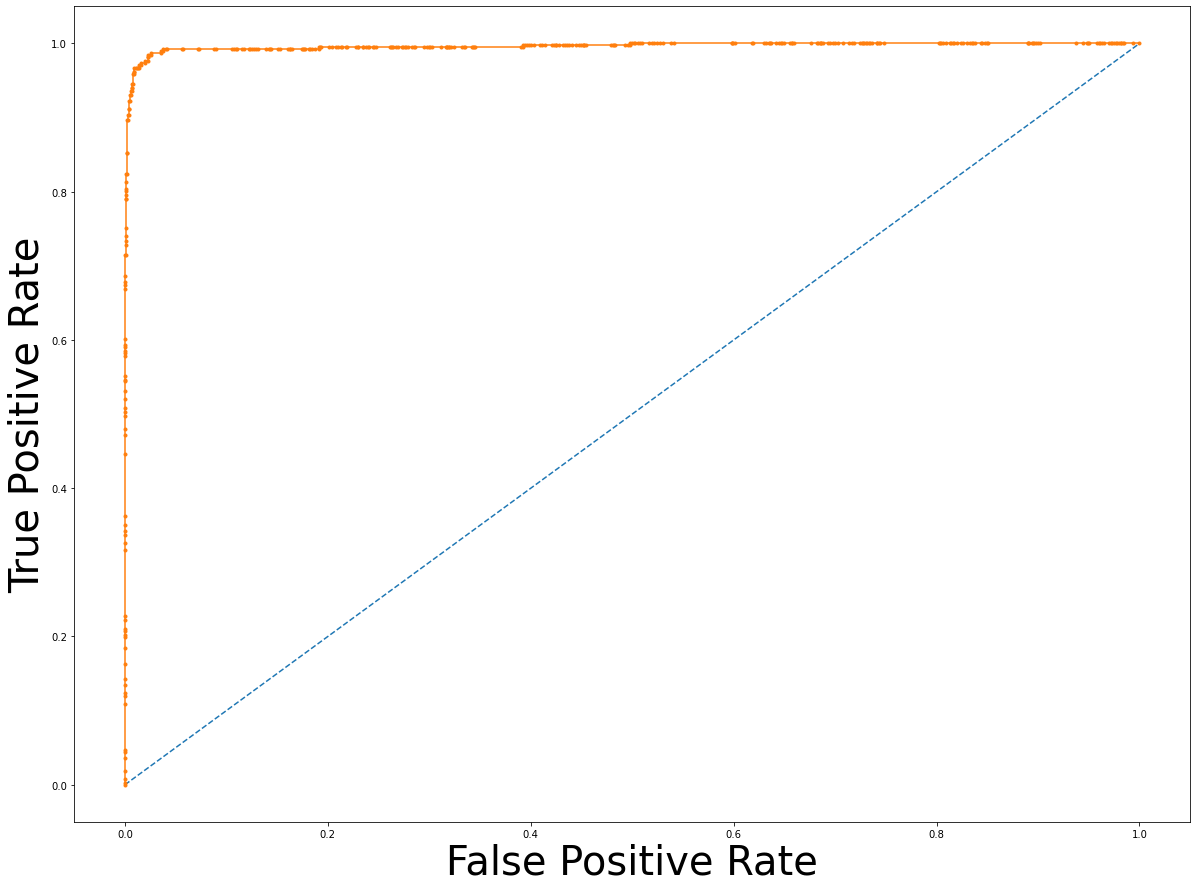

In [5]:
pid_kp_pip.bdt_model('ss')

pid_kp_pip.predict()
pid_kp_pip.roc_auc()
fig,ax = plt.subplots(figsize=(20,15))
pid_kp_pip.roc_curve()
roc_curves['kp_pip_bdt_ns_fpr'] = pid_kp_pip.ns_fpr
roc_curves['kp_pip_bdt_ns_tpr'] = pid_kp_pip.ns_tpr
roc_curves['kp_pip_bdt_lr_fpr'] = pid_kp_pip.lr_fpr
roc_curves['kp_pip_bdt_lr_tpr'] = pid_kp_pip.lr_tpr

ml_metrics['kp_pip_bdt_auc'] = pid_kp_pip.lr_auc
ml_metrics['kp_pip_bdt_acc'] = pid_kp_pip.accuracy

pid_kp_pip.confusion_matrix()
ml_confusions['kp_pip_bdt_confusion'] = pid_kp_pip.confusion

print(pid_kp_pip.confusion)
print(pid_kp_pip.lr_auc)
print(pid_kp_pip.accuracy)

In [6]:
pid_kp_pip.k_fold_cv(5)
count = 0
for train,test in pid_kp_pip.pid_k_fold_split:
    if count == 0:
        print(len(train),len(test))
    pid_kp_pip.bdt_model_cv(train,test)
    count+=1
    
cv_analysis['kp_pip_bdt_acc'] = pid_kp_pip.accuracies
cv_analysis['kp_pip_bdt_auc'] = pid_kp_pip.lr_aucs

8000 2000
0.997 0.9999104653244992
0.9915 0.9992877405786114
0.9915 0.9993519088163882
0.9905 0.9987791959794221
0.991 0.9996366637107104


pid_pip_kp.bdt_model('ss')

pid_pip_kp.predict()
pid_pip_kp.roc_auc()
fig,ax = plt.subplots(figsize=(20,15))
pid_pip_kp.roc_curve()
roc_curves['pip_kp_bdt_ns_fpr'] = pid_pip_kp.ns_fpr
roc_curves['pip_kp_bdt_ns_tpr'] = pid_pip_kp.ns_tpr
roc_curves['pip_kp_bdt_lr_fpr'] = pid_pip_kp.lr_fpr
roc_curves['pip_kp_bdt_lr_tpr'] = pid_pip_kp.lr_tpr

ml_metrics['pip_kp_bdt_auc'] = pid_pip_kp.lr_auc
ml_metrics['pip_kp_bdt_acc'] = pid_pip_kp.accuracy

pid_pip_kp.confusion_matrix()
ml_confusions['pip_kp_bdt_confusion'] = pid_pip_kp.confusion

print(pid_pip_kp.lr_auc)
print(pid_pip_kp.accuracy)

pid_pip_kp.k_fold_cv(10)
count = 0
for train,test in pid_pip_kp.pid_k_fold_split:
    if count == 0:
        print(len(train),len(test))
    pid_pip_kp.bdt_model_cv(train,test)
    count+=1
    
cv_analysis2['pip_kp_bdt_acc'] = pid_pip_kp.accuracies
cv_analysis2['pip_kp_bdt_auc'] = pid_pip_kp.lr_aucs

## Random forest

0.9977247337095748
0.9875


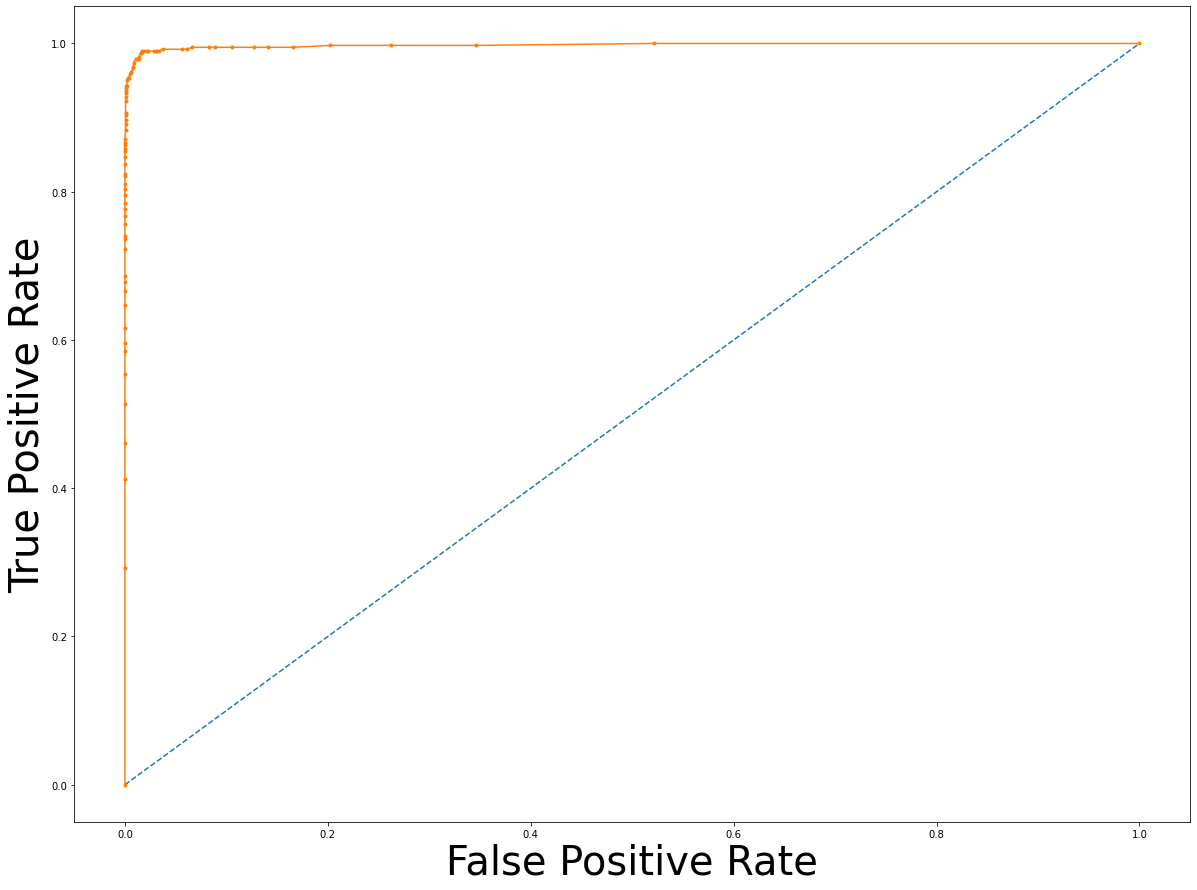

In [7]:
pid_kp_pip.rf_model('ss')

pid_kp_pip.predict()
pid_kp_pip.roc_auc()
fig,ax = plt.subplots(figsize=(20,15))
pid_kp_pip.roc_curve()
roc_curves['kp_pip_rf_ns_fpr'] = pid_kp_pip.ns_fpr
roc_curves['kp_pip_rf_ns_tpr'] = pid_kp_pip.ns_tpr
roc_curves['kp_pip_rf_lr_fpr'] = pid_kp_pip.lr_fpr
roc_curves['kp_pip_rf_lr_tpr'] = pid_kp_pip.lr_tpr

ml_metrics['kp_pip_rf_auc'] = pid_kp_pip.lr_auc
ml_metrics['kp_pip_rf_acc'] = pid_kp_pip.accuracy

pid_kp_pip.confusion_matrix()
ml_confusions['kp_pip_rf_confusion'] = pid_kp_pip.confusion

print(pid_kp_pip.lr_auc)
print(pid_kp_pip.accuracy)

In [8]:
pid_kp_pip.k_fold_cv(5)
count = 0
for train,test in pid_kp_pip.pid_k_fold_split:
    if count == 0:
        print(len(train),len(test))
    pid_kp_pip.rf_model_cv(train,test)
    count+=1
    
cv_analysis['kp_pip_rf_acc'] = pid_kp_pip.accuracies
cv_analysis['kp_pip_rf_auc'] = pid_kp_pip.lr_aucs

8000 2000
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0


pid_pip_kp.rf_model('ss')

pid_pip_kp.predict()
pid_pip_kp.roc_auc()
fig,ax = plt.subplots(figsize=(20,15))
pid_pip_kp.roc_curve()
roc_curves['pip_kp_rf_ns_fpr'] = pid_pip_kp.ns_fpr
roc_curves['pip_kp_rf_ns_tpr'] = pid_pip_kp.ns_tpr
roc_curves['pip_kp_rf_lr_fpr'] = pid_pip_kp.lr_fpr
roc_curves['pip_kp_rf_lr_tpr'] = pid_pip_kp.lr_tpr

ml_metrics['pip_kp_rf_auc'] = pid_pip_kp.lr_auc
ml_metrics['pip_kp_rf_acc'] = pid_pip_kp.accuracy

pid_pip_kp.confusion_matrix()
ml_confusions['pip_kp_rf_confusion'] = pid_pip_kp.confusion

print(pid_pip_kp.lr_auc)
print(pid_pip_kp.accuracy)

pid_pip_kp.k_fold_cv(10)
count = 0
for train,test in pid_pip_kp.pid_k_fold_split:
    if count == 0:
        print(len(train),len(test))
    pid_pip_kp.rf_model_cv(train,test)
    count+=1
    
cv_analysis2['pip_kp_rf_acc'] = pid_pip_kp.accuracies
cv_analysis2['pip_kp_rf_auc'] = pid_pip_kp.lr_aucs

## Support vector machine

0.9604962407946015
0.9225


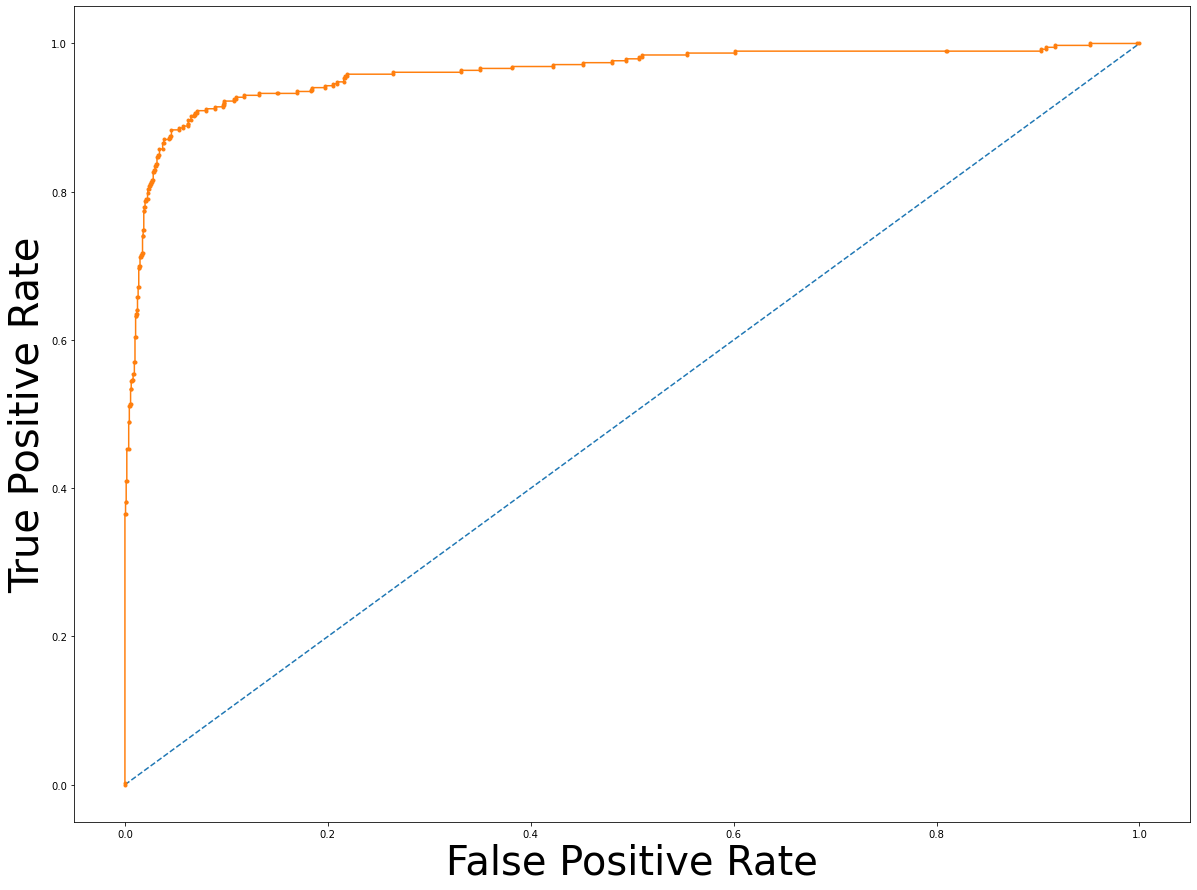

In [9]:
pid_kp_pip.svm_model('ss')

pid_kp_pip.predict()
pid_kp_pip.roc_auc()
fig,ax = plt.subplots(figsize=(20,15))
pid_kp_pip.roc_curve()
roc_curves['kp_pip_svm_ns_fpr'] = pid_kp_pip.ns_fpr
roc_curves['kp_pip_svm_ns_tpr'] = pid_kp_pip.ns_tpr
roc_curves['kp_pip_svm_lr_fpr'] = pid_kp_pip.lr_fpr
roc_curves['kp_pip_svm_lr_tpr'] = pid_kp_pip.lr_tpr

ml_metrics['kp_pip_svm_auc'] = pid_kp_pip.lr_auc
ml_metrics['kp_pip_svm_acc'] = pid_kp_pip.accuracy

pid_kp_pip.confusion_matrix()
ml_confusions['kp_pip_svm_confusion'] = pid_kp_pip.confusion

print(pid_kp_pip.lr_auc)
print(pid_kp_pip.accuracy)

In [10]:
pid_kp_pip.k_fold_cv(5)
count = 0
for train,test in pid_kp_pip.pid_k_fold_split:
    if count == 0:
        print(len(train),len(test))
    pid_kp_pip.svm_model_cv(train,test)
    count+=1
    
cv_analysis['kp_pip_svm_acc'] = pid_kp_pip.accuracies
cv_analysis['kp_pip_svm_auc'] = pid_kp_pip.lr_aucs

8000 2000
0.806 0.5
0.794 0.5
0.8005 0.5
0.8035 0.5
0.796 0.5


pid_pip_kp.svm_model('ss')

pid_pip_kp.predict()
pid_pip_kp.roc_auc()
fig,ax = plt.subplots(figsize=(20,15))
pid_pip_kp.roc_curve()
roc_curves['pip_kp_svm_ns_fpr']= pid_pip_kp.ns_fpr
roc_curves['pip_kp_svm_ns_tpr']= pid_pip_kp.ns_tpr
roc_curves['pip_kp_svm_lr_fpr']= pid_pip_kp.lr_fpr
roc_curves['pip_kp_svm_lr_tpr']= pid_pip_kp.lr_tpr

ml_metrics['pip_kp_svm_auc'] = pid_pip_kp.lr_auc
ml_metrics['pip_kp_svm_acc'] = pid_pip_kp.accuracy

pid_pip_kp.confusion_matrix()
ml_confusions['pip_kp_svm_confusion'] = pid_pip_kp.confusion

print(pid_pip_kp.lr_auc)
print(pid_pip_kp.accuracy)

pid_pip_kp.k_fold_cv(10)
count = 0
for train,test in pid_pip_kp.pid_k_fold_split:
    if count == 0:
        print(len(train),len(test))
    pid_pip_kp.svm_model_cv(train,test)
    count+=1

cv_analysis2['pip_kp_svm_acc'] = pid_pip_kp.accuracies
cv_analysis2['pip_kp_svm_auc'] = pid_pip_kp.lr_aucs

## MLP classifier

0.9346585254669313
0.9495


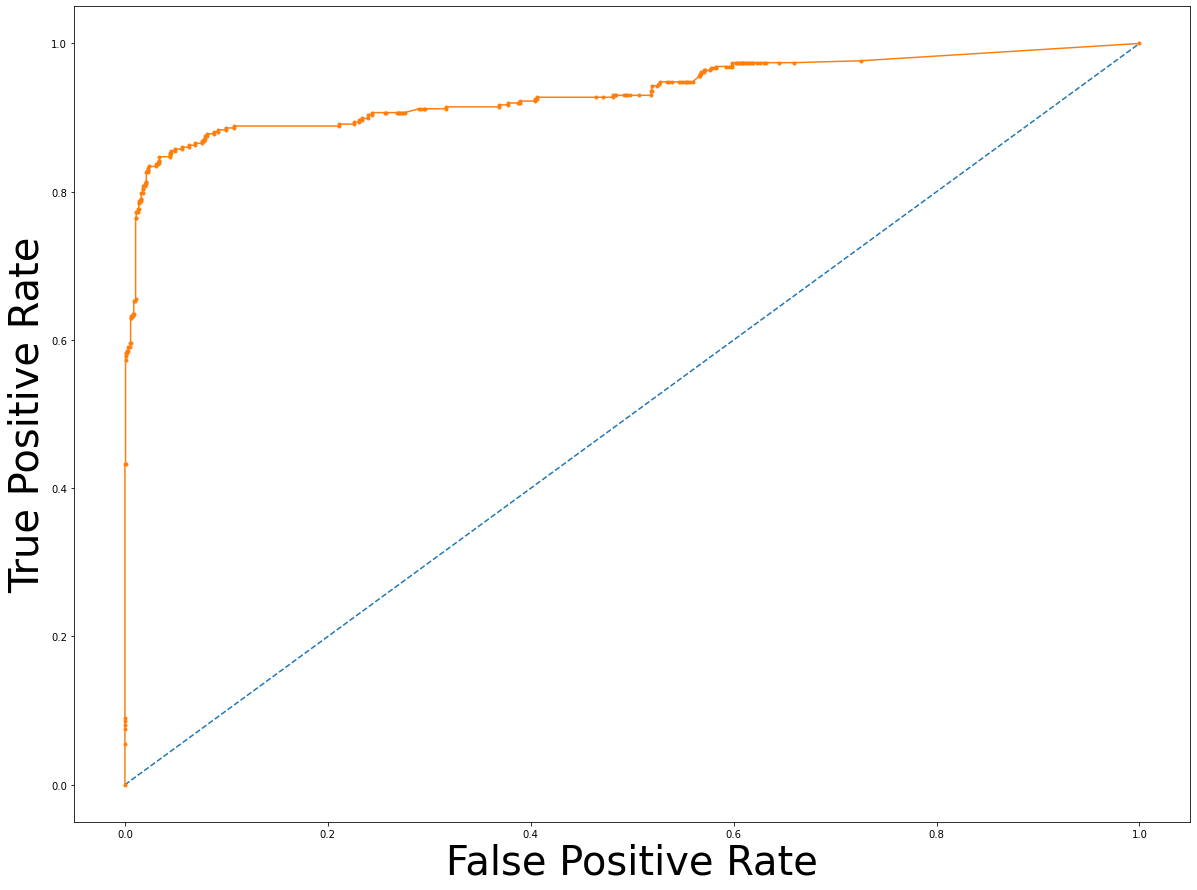

In [11]:
pid_kp_pip.nn_model('ss')

pid_kp_pip.predict()
pid_kp_pip.roc_auc()
fig,ax = plt.subplots(figsize=(20,15))
pid_kp_pip.roc_curve()
roc_curves['kp_pip_nn_ns_fpr'] = pid_kp_pip.ns_fpr
roc_curves['kp_pip_nn_ns_tpr'] = pid_kp_pip.ns_tpr
roc_curves['kp_pip_nn_lr_fpr'] = pid_kp_pip.lr_fpr
roc_curves['kp_pip_nn_lr_tpr'] = pid_kp_pip.lr_tpr

ml_metrics['kp_pip_nn_auc'] = pid_kp_pip.lr_auc
ml_metrics['kp_pip_nn_acc'] = pid_kp_pip.accuracy

pid_kp_pip.confusion_matrix()
ml_confusions['kp_pip_nn_confusion'] = pid_kp_pip.confusion

print(pid_kp_pip.lr_auc)
print(pid_kp_pip.accuracy)


In [12]:
pid_kp_pip.k_fold_cv(5)
count = 0
for train,test in pid_kp_pip.pid_k_fold_split:
    if count == 0:
        print(len(train),len(test))
    pid_kp_pip.nn_model_cv(train,test)
    count+=1
    
cv_analysis['kp_pip_nn_acc'] = pid_kp_pip.accuracies
cv_analysis['kp_pip_nn_auc'] = pid_kp_pip.lr_aucs

8000 2000
0.805 0.5174057008006957
0.793 0.5083124954146389
0.7995 0.5261780309612257
0.8025 0.5415097118047474
0.795 0.5300968691496698


pid_pip_kp.nn_model('ss')

pid_pip_kp.predict()
pid_pip_kp.roc_auc()
fig,ax = plt.subplots(figsize=(20,15))
pid_pip_kp.roc_curve()
roc_curves['pip_kp_nn_ns_fpr'] = pid_pip_kp.ns_fpr
roc_curves['pip_kp_nn_ns_tpr'] = pid_pip_kp.ns_tpr
roc_curves['pip_kp_nn_lr_fpr'] = pid_pip_kp.lr_fpr
roc_curves['pip_kp_nn_lr_tpr'] = pid_pip_kp.lr_tpr

ml_metrics['pip_kp_nn_auc'] = pid_pip_kp.lr_auc
ml_metrics['pip_kp_nn_acc'] = pid_pip_kp.accuracy

pid_pip_kp.confusion_matrix()
ml_confusions['pip_kp_nn_confusion'] = pid_pip_kp.confusion

print(pid_pip_kp.lr_auc)
print(pid_pip_kp.accuracy)

pid_pip_kp.k_fold_cv(10)
count = 0
for train,test in pid_pip_kp.pid_k_fold_split:
    if count == 0:
        print(len(train),len(test))
    pid_pip_kp.nn_model_cv(train,test)
    count+=1
    
cv_analysis2['pip_kp_nn_acc'] = pid_pip_kp.accuracies
cv_analysis2['pip_kp_nn_auc'] = pid_pip_kp.lr_aucs

## AdaBoost

0.9935875211074086
0.9795


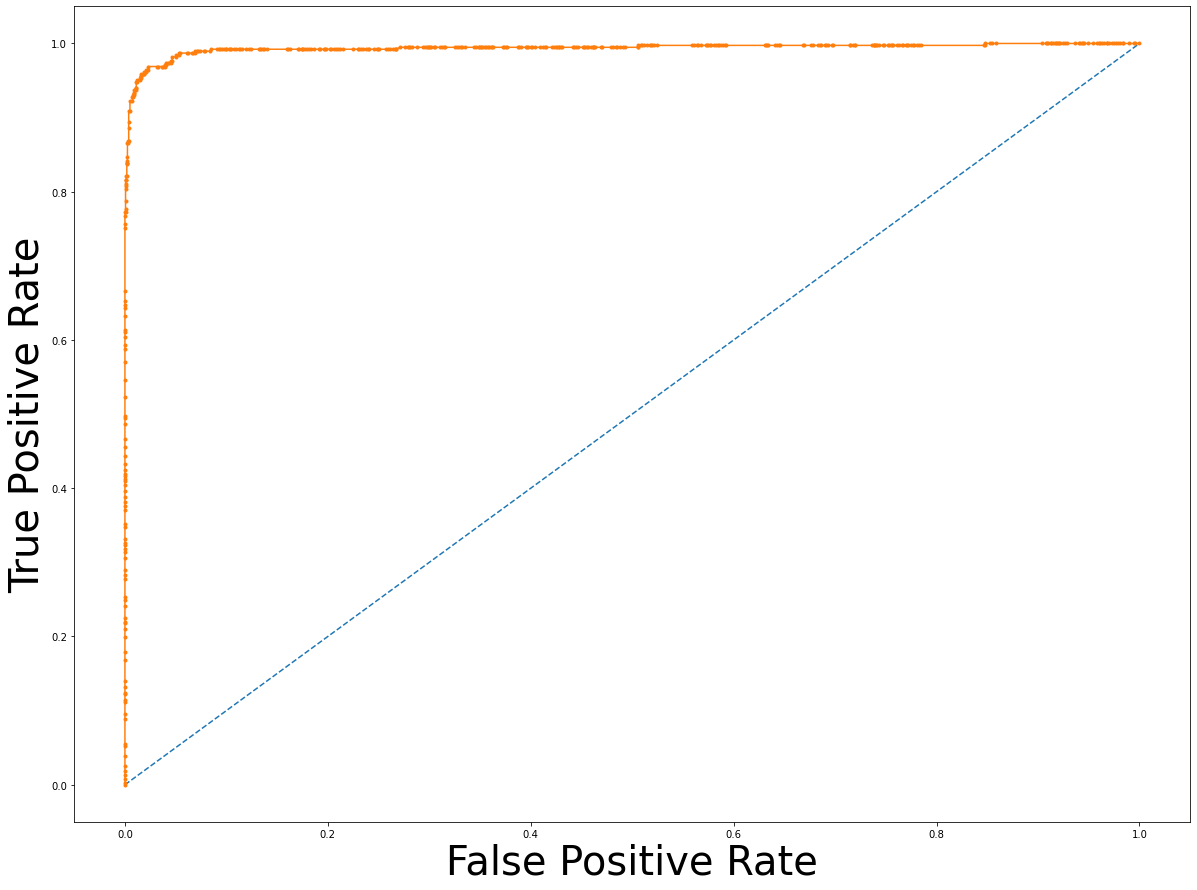

In [13]:
pid_kp_pip.ada_model('ss')

pid_kp_pip.predict()
pid_kp_pip.roc_auc()
fig,ax = plt.subplots(figsize=(20,15))
pid_kp_pip.roc_curve()
roc_curves['kp_pip_ada_ns_fpr'] = pid_kp_pip.ns_fpr
roc_curves['kp_pip_ada_ns_tpr'] = pid_kp_pip.ns_tpr
roc_curves['kp_pip_ada_lr_fpr'] = pid_kp_pip.lr_fpr
roc_curves['kp_pip_ada_lr_tpr'] = pid_kp_pip.lr_tpr

ml_metrics['kp_pip_ada_auc'] = pid_kp_pip.lr_auc
ml_metrics['kp_pip_ada_acc'] = pid_kp_pip.accuracy

pid_kp_pip.confusion_matrix()
ml_confusions['kp_pip_ada_confusion'] = pid_kp_pip.confusion

print(pid_kp_pip.lr_auc)
print(pid_kp_pip.accuracy)

In [14]:
pid_kp_pip.k_fold_cv(5)
count = 0
for train,test in pid_kp_pip.pid_k_fold_split:
    if count == 0:
        print(len(train),len(test))
    pid_kp_pip.ada_model_cv(train,test)
    count+=1
    
cv_analysis['kp_pip_ada_acc'] = pid_kp_pip.accuracies
cv_analysis['kp_pip_ada_auc'] = pid_kp_pip.lr_aucs

8000 2000
0.984 0.9986202066971938
0.9805 0.9974039214007973
0.9855 0.9982216628391717
0.9835 0.9978901149709208
0.9825 0.9982356636121785


pid_pip_kp.ada_model('ss')

pid_pip_kp.predict()
pid_pip_kp.roc_auc()
fig,ax = plt.subplots(figsize=(20,15))
pid_pip_kp.roc_curve()
roc_curves['pip_kp_ada_ns_fpr'] = pid_pip_kp.ns_fpr
roc_curves['pip_kp_ada_ns_tpr'] = pid_pip_kp.ns_tpr
roc_curves['pip_kp_ada_lr_fpr'] = pid_pip_kp.lr_fpr
roc_curves['pip_kp_ada_lr_tpr'] = pid_pip_kp.lr_tpr

ml_metrics['pip_kp_ada_auc'] = pid_pip_kp.lr_auc
ml_metrics['pip_kp_ada_acc'] = pid_pip_kp.accuracy

pid_pip_kp.confusion_matrix()
ml_confusions['pip_kp_ada_confusion'] = pid_pip_kp.confusion

print(pid_pip_kp.lr_auc)
print(pid_pip_kp.accuracy)

pid_pip_kp.k_fold_cv(10)
count = 0
for train,test in pid_pip_kp.pid_k_fold_split:
    if count == 0:
        print(len(train),len(test))
    pid_pip_kp.ada_model_cv(train,test)
    count+=1
    
cv_analysis2['pip_kp_ada_acc'] = pid_pip_kp.accuracies
cv_analysis2['pip_kp_ada_auc'] = pid_pip_kp.lr_aucs

In [15]:
import pandas as pd

cv_df = pd.DataFrame.from_dict(cv_analysis)
print(cv_df.columns)
acc_columns = []
auc_columns = []
for col in cv_df.columns:
    if 'acc' in col:
        acc_columns.append(col)
    if 'auc' in col:
        auc_columns.append(col)
#cv_df2 = pd.DataFrame.from_dict(cv_analysis2)
#acc_columns2 = []
#auc_columns2 = []
#for col in cv_df2.columns:
#    if 'acc' in col:
#        acc_columns2.append(col)
#    if 'auc' in col:
#        auc_columns2.append(col)

Index(['kp_pip_bdt_acc', 'kp_pip_bdt_auc', 'kp_pip_rf_acc', 'kp_pip_rf_auc',
       'kp_pip_svm_acc', 'kp_pip_svm_auc', 'kp_pip_nn_acc', 'kp_pip_nn_auc',
       'kp_pip_ada_acc', 'kp_pip_ada_auc'],
      dtype='object')


In [16]:
cv_df.describe()

,kp_pip_bdt_acc,kp_pip_bdt_auc,kp_pip_rf_acc,kp_pip_rf_auc,kp_pip_svm_acc,kp_pip_svm_auc,kp_pip_nn_acc,kp_pip_nn_auc,kp_pip_ada_acc,kp_pip_ada_auc
count,5.00000,5.000000,5.0,5.0,5.000000,5.0,5.000000,5.000000,5.000000,5.000000
mean,0.99230,0.999393,1.0,1.0,0.800000,0.5,0.799000,0.524701,0.983200,0.998074
std,0.00266,0.000423,0.0,0.0,0.005012,0.0,0.005012,0.012606,0.001857,0.000455
min,0.99050,0.998779,1.0,1.0,0.794000,0.5,0.793000,0.508312,0.980500,0.997404
25%,0.99100,0.999288,1.0,1.0,0.796000,0.5,0.795000,0.517406,0.982500,0.997890
50%,0.99150,0.999352,1.0,1.0,0.800500,0.5,0.799500,0.526178,0.983500,0.998222
75%,0.99150,0.999637,1.0,1.0,0.803500,0.5,0.802500,0.530097,0.984000,0.998236
max,0.99700,0.999910,1.0,1.0,0.806000,0.5,0.805000,0.541510,0.985500,0.998620


cv_df2.describe()

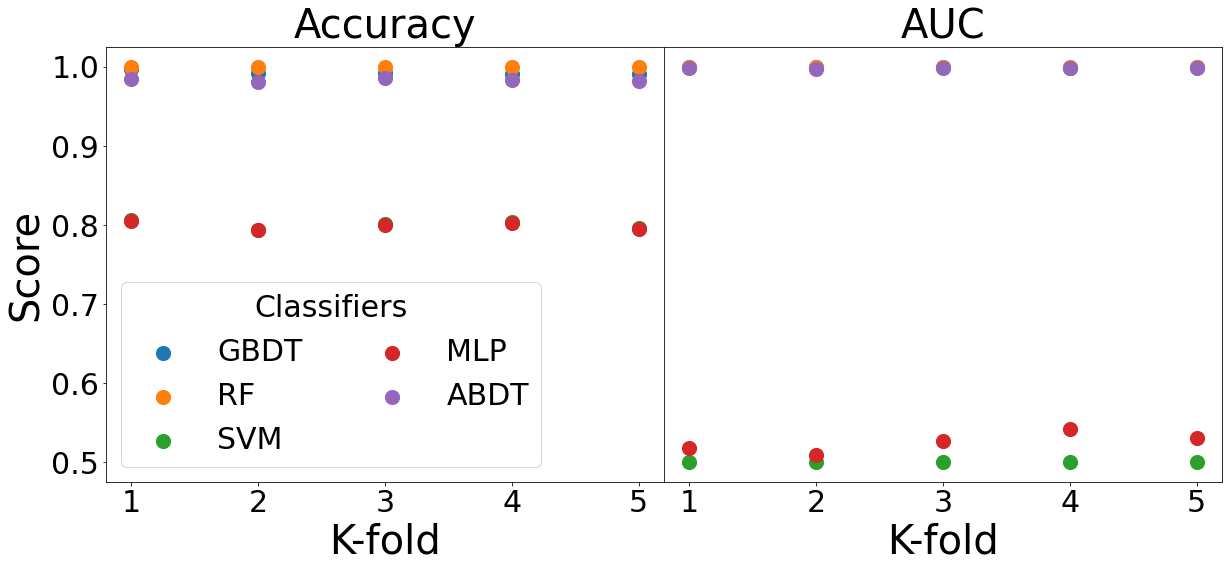

In [25]:
label_dict={'bdt':'GBDT','rf':'RF','svm':'SVM','nn':'MLP','ada':'ABDT'}
fig, ax = plt.subplots(1,2,sharex='all',sharey='row',figsize=(20,8))
for col in acc_columns:
    ax[0].scatter(range(1,6),cv_df[col],label=label_dict[col.replace('kp_pip_','').replace('_acc','')],s=200)
ax[0].set_xlabel('K-fold',fontsize=40)
ax[0].set_ylabel('Score',fontsize=40)
ax[0].set_title(r'Accuracy',fontsize=40)
ax[0].tick_params(axis='x',labelsize=30)
ax[0].tick_params(axis='y',labelsize=30)

#for col in acc_columns2:
#    ax[0,1].scatter(range(1,11),cv_df2[col],label=label_dict[col.replace('pip_kp_','').replace('_acc','')],s=100)
#ax[0,1].set_title(r'$N(\pi)=9N(K)$',fontsize=20)
#ax[0,1].tick_params(axis='y',which='both',left=False,labelbottom=False)

for col in auc_columns:
    ax[1].scatter(range(1,6),cv_df[col],label=label_dict[col.replace('kp_pip_','').replace('_auc','')],s=200)
ax[1].set_xlabel('K-fold',fontsize=40)
ax[1].set_title('AUC',fontsize=40)
#ax[1].tick_params(axis='y',labelsize=15)
ax[1].tick_params(axis='x',labelsize=30)
ax[1].tick_params(axis='y',which='both',left=False,labelbottom=False)

#for col in auc_columns2:
#    ax[1,1].scatter(range(1,11),cv_df2[col],label=label_dict[col.replace('pip_kp_','').replace('_auc','')],s=100)
#ax[1,1].set_xlabel('K-fold',fontsize=20)
#ax[1,1].tick_params(axis='y',which='both',left=False,labelbottom=False)
#ax[1,1].tick_params(axis='x',labelsize=15)

plt.subplots_adjust(wspace=0., hspace=0)
ax[0].legend(loc='lower left',fontsize=30,title='Classifiers',title_fontsize=30,ncol=2)
fig.savefig('CV_analysis.pdf',dpi=300,bbox_inches='tight')

In [18]:
from statistics import mean,variance,stdev
acc_mean_kp_pip = {}
acc_stdev_kp_pip = {}
#acc_mean_pip_kp = {}
#acc_stdev_pip_kp = {}

for col in acc_columns:
    acc_mean_kp_pip[col.replace('kp_pip_','').replace('_acc','')] = mean(cv_df[col])
    acc_stdev_kp_pip[col.replace('kp_pip_','').replace('_acc','')] = stdev(cv_df[col])    
    
#for col in acc_columns2:
#    acc_mean_pip_kp[col.replace('pip_kp_','').replace('_acc','')] = mean(cv_df2[col])
#    acc_stdev_pip_kp[col.replace('pip_kp_','').replace('_acc','')] = stdev(cv_df2[col])
    
auc_mean_kp_pip = {}
auc_stdev_kp_pip = {}
#auc_mean_pip_kp = {}
#auc_stdev_pip_kp = {}

for col in auc_columns:
    auc_mean_kp_pip[col.replace('kp_pip_','').replace('_auc','')] = mean(cv_df[col])
    auc_stdev_kp_pip[col.replace('kp_pip_','').replace('_auc','')] = stdev(cv_df[col])    
    
#for col in auc_columns2:
#    auc_mean_pip_kp[col.replace('pip_kp_','').replace('_auc','')] = mean(cv_df2[col])
#    auc_stdev_pip_kp[col.replace('pip_kp_','').replace('_auc','')] = stdev(cv_df2[col])
    

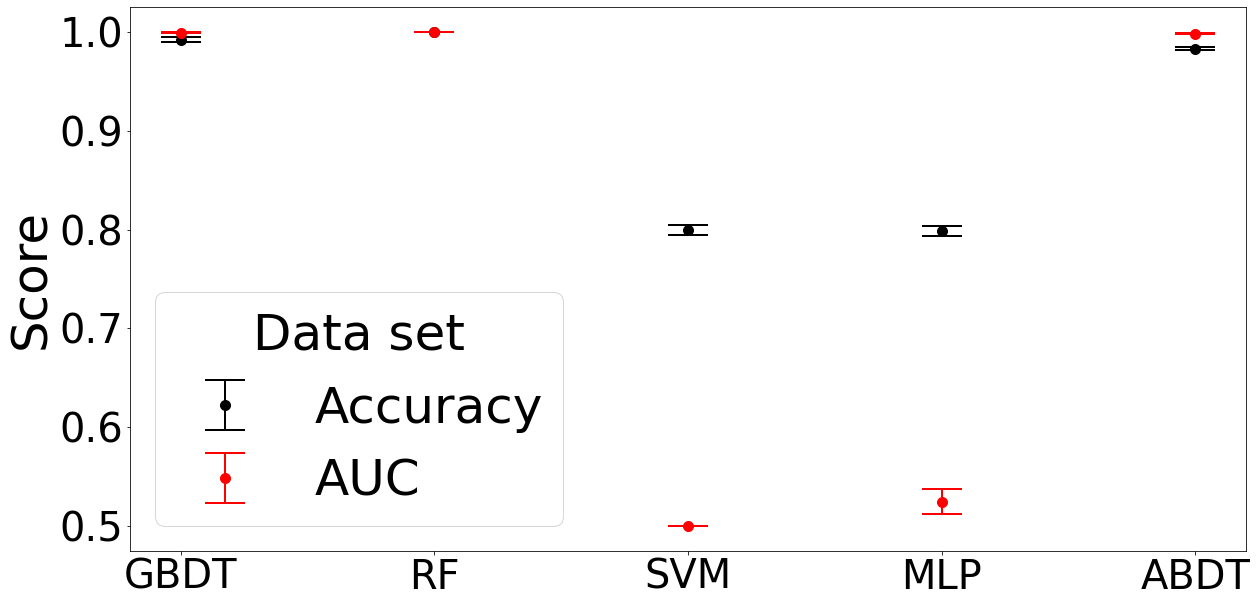

In [19]:
fig, ax = plt.subplots(1,1,sharex='all',sharey='all',figsize=(20,10))

from numpy import arange
x1 = arange(0.0,5.0)
#x2 = arange(0.05,5.05)

ax.errorbar(list(label_dict.values()),acc_mean_kp_pip.values(),yerr=acc_stdev_kp_pip.values(),ms=20,fmt='.',color='k',lw=2,capsize=20,capthick=2,label=r'Accuracy')
#ax[0].errorbar(x2,acc_mean_pip_kp.values(),yerr=acc_stdev_pip_kp.values(),ms=20,fmt='o',color='r',lw=2,capsize=10,capthick=2,label=r'$N(\pi)=9N(K)$')
#for tick in ax[0].get_xticklabels():
#    tick.set_rotation(90)
labels = [item.get_text() for item in ax.get_xticklabels()]
count = 0
label_list = list(label_dict.values())
#label_list.insert(0,'')
#label_list.insert(1,'')
#ax[0].set_xticklabels(label_list)
ax.tick_params(axis='y',labelsize=40)
ax.tick_params(axis='x',labelsize=40)
ax.set_ylabel('Score',fontsize=50)
#ax.set_title('CV mean accuracies',fontsize=50)

ax.errorbar(list(label_dict.values()),auc_mean_kp_pip.values(),yerr=auc_stdev_kp_pip.values(),ms=20,fmt='.',color='r',lw=2,capsize=20,capthick=2,label=r'AUC')
#ax[1].errorbar(x2,auc_mean_pip_kp.values(),yerr=auc_stdev_pip_kp.values(),ms=20,fmt='o',color='r',lw=2,capsize=10,capthick=2,label=r'$N(\pi)=9N(K)$')
#for tick in ax[1].get_xticklabels():
#    tick.set_rotation(90)
#ax[1].set_xticklabels(label_list)
ax.tick_params(axis='x',labelsize=40)
#ax[1].tick_params(axis='y',which='both',left=False,labelbottom=False)
#ax.set_title('CV mean AUC',fontsize=50)

ax.legend(fontsize=50,title='Data set',title_fontsize=50)
plt.subplots_adjust(wspace=0.02, hspace=0)
fig.savefig('cv_results_per_classifier.pdf',dpi=300,bbox_inches='tight')

In [20]:
#pip_kp_roc_curves_tpr = []
#pip_kp_roc_curves_fpr = []
kp_pip_roc_curves_tpr = []
kp_pip_roc_curves_fpr = []

for key in roc_curves.keys():
    if 'ns' in key:
        continue
    #if 'pip_kp' in key:
    #    if 'tpr' in key:
    #        pip_kp_roc_curves_tpr.append(key)
    #    if 'fpr' in key:
    #        pip_kp_roc_curves_fpr.append(key)
    if 'kp_pip' in key:
        if 'tpr' in key:
            kp_pip_roc_curves_tpr.append(key)
        if 'fpr' in key:
            kp_pip_roc_curves_fpr.append(key)

#print(pip_kp_roc_curves_tpr)
print(kp_pip_roc_curves_tpr)
#print(pip_kp_roc_curves_fpr)
print(kp_pip_roc_curves_fpr)

['kp_pip_bdt_lr_tpr', 'kp_pip_rf_lr_tpr', 'kp_pip_svm_lr_tpr', 'kp_pip_nn_lr_tpr', 'kp_pip_ada_lr_tpr']
['kp_pip_bdt_lr_fpr', 'kp_pip_rf_lr_fpr', 'kp_pip_svm_lr_fpr', 'kp_pip_nn_lr_fpr', 'kp_pip_ada_lr_fpr']


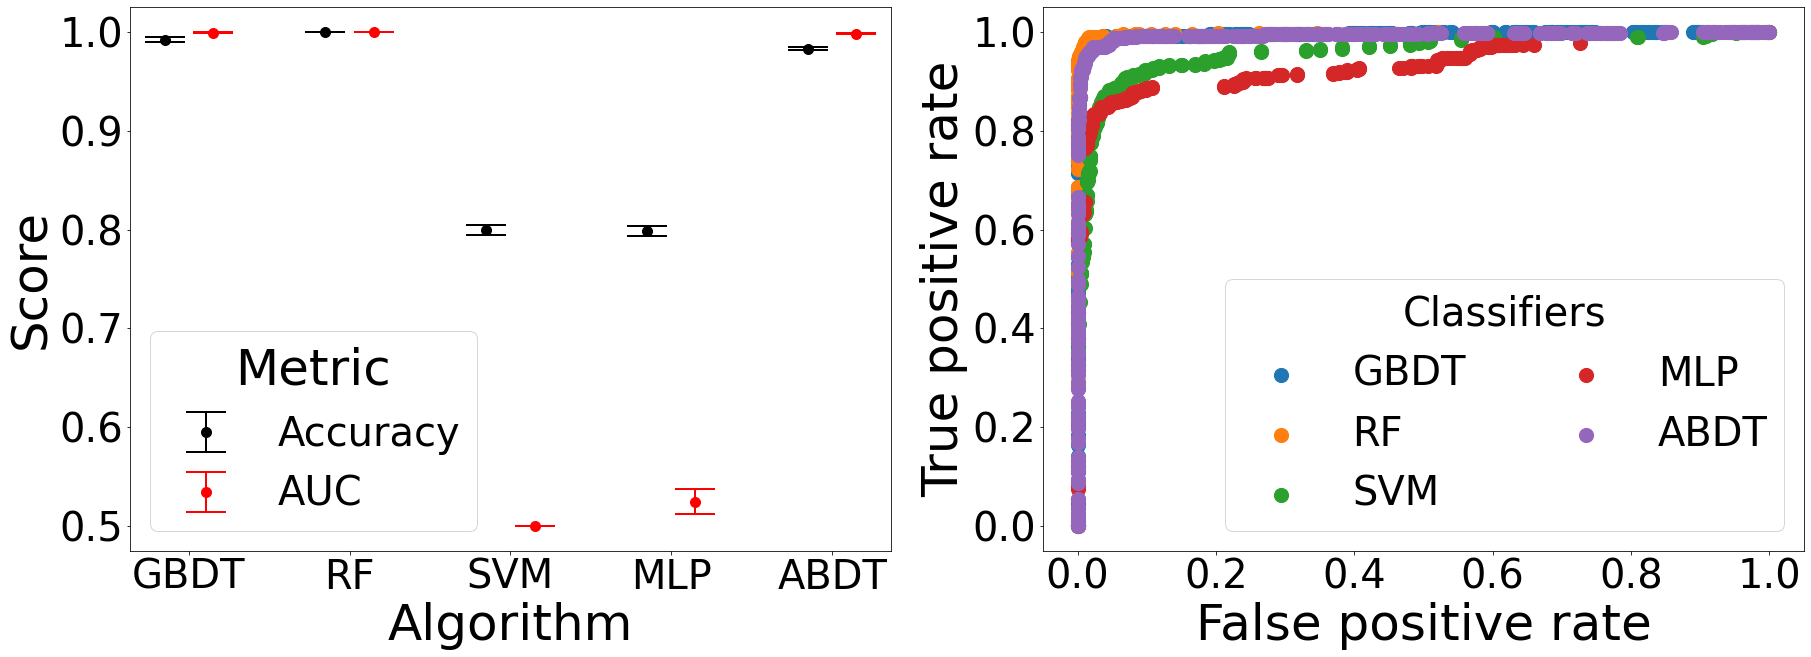

In [50]:
fig, ax = plt.subplots(1,2,figsize=(30,10))

from numpy import arange
x1 = arange(-0.15,4.85)
x2 = arange(0.15,5.15)

ax[0].errorbar(x1,acc_mean_kp_pip.values(),yerr=acc_stdev_kp_pip.values(),ms=20,fmt='.',color='k',lw=2,capsize=20,capthick=2,label=r'Accuracy')
#ax[0].errorbar(x2,acc_mean_pip_kp.values(),yerr=acc_stdev_pip_kp.values(),ms=20,fmt='o',color='r',lw=2,capsize=10,capthick=2,label=r'$N(\pi)=9N(K)$')
#for tick in ax[0].get_xticklabels():
#    tick.set_rotation(90)
labels = [item.get_text() for item in ax[0].get_xticklabels()]
count = 0
label_list = list(label_dict.values())
label_list.insert(0,'')
#label_list.insert(1,'')
ax[0].set_xticklabels(label_list)
ax[0].tick_params(axis='y',labelsize=40)
ax[0].tick_params(axis='x',labelsize=40)
ax[0].set_xlabel('Algorithm',fontsize=50)
ax[0].set_ylabel('Score',fontsize=50)
#ax.set_title('CV mean accuracies',fontsize=50)

ax[0].errorbar(x2,auc_mean_kp_pip.values(),yerr=auc_stdev_kp_pip.values(),ms=20,fmt='.',color='r',lw=2,capsize=20,capthick=2,label=r'AUC')
#ax[1].errorbar(x2,auc_mean_pip_kp.values(),yerr=auc_stdev_pip_kp.values(),ms=20,fmt='o',color='r',lw=2,capsize=10,capthick=2,label=r'$N(\pi)=9N(K)$')
#for tick in ax[1].get_xticklabels():
#    tick.set_rotation(90)
#ax[1].set_xticklabels(label_list)
ax[0].tick_params(axis='x',labelsize=40)
#ax[1].tick_params(axis='y',which='both',left=False,labelbottom=False)
#ax.set_title('CV mean AUC',fontsize=50)

ax[0].legend(fontsize=40,title='Metric',title_fontsize=50)
#plt.subplots_adjust(wspace=0.02, hspace=0)

for tpr,fpr in zip(kp_pip_roc_curves_tpr,kp_pip_roc_curves_fpr):
    ax[1].scatter(roc_curves[fpr],roc_curves[tpr],s=200,label=label_dict[tpr.replace('kp_pip_','').replace('_lr_tpr',"")])
#ax[1].set_title(r'$N(K)=4N(\pi)$',fontsize=40)
ax[1].set_ylabel('True positive rate',fontsize=50)
ax[1].set_xlabel('False positive rate',fontsize=50)
ax[1].tick_params(axis='y',labelsize=40)
ax[1].tick_params(axis='x',labelsize=40)


#for tpr,fpr in zip(pip_kp_roc_curves_tpr,pip_kp_roc_curves_fpr):
#    ax[1].scatter(roc_curves[fpr],roc_curves[tpr],s=200,label=label_dict[tpr.replace('pip_kp_','').replace('_lr_tpr',"")])
#ax[1].tick_params(axis='y',which='both',left=False,labelbottom=False)
#ax[1].set_title(r'$N(\pi)=9N(K)$',fontsize=40)
#ax[1].set_xlabel('False positive rate',fontsize=40)
#ax[1].tick_params(axis='x',labelsize=30)
ax[1].legend(loc='lower right',fontsize=40,title='Classifiers',title_fontsize=40,ncol=2)

plt.subplots_adjust(wspace=0.2, hspace=0)
fig.savefig('roc_curve_analysis.pdf',dpi=300,bbox_inches='tight')

In [22]:
print(ml_metrics)

{'kp_pip_bdt_auc': 0.9959358206367857, 'kp_pip_bdt_acc': 0.984, 'kp_pip_rf_auc': 0.9977247337095748, 'kp_pip_rf_acc': 0.9875, 'kp_pip_svm_auc': 0.9604962407946015, 'kp_pip_svm_acc': 0.9225, 'kp_pip_nn_auc': 0.9346585254669313, 'kp_pip_nn_acc': 0.9495, 'kp_pip_ada_auc': 0.9935875211074086, 'kp_pip_ada_acc': 0.9795}
